In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 

In [4]:
class AgentState(TypedDict):
  name:str
  values : List[int]
  result: str
  operator : str
  

In [5]:
from functools import reduce


def process_values(state: AgentState) -> AgentState:
  """Function that Update values

  Args:
      state (AgentState): state

  Returns:
      AgentState: state
  """
  if(state["operator"] == "+"):
    result = sum(state["values"])
  elif(state["operator"]=="-"):
    result  = reduce(lambda x, y: x - y, state["values"])

  state["result"] = f"Hi there {state["name"]}! Your sum = {result}"

  return state

In [6]:
graph = StateGraph(AgentState)
graph.set_entry_point("processor")
graph.add_node("processor",process_values)
graph.set_finish_point("processor")

app = graph.compile()

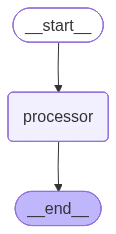

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
answers = app.invoke({"values": [1,2,3,4], "name": "Steve" , "operator":"+"})

In [11]:
print(answers)

{'name': 'Steve', 'values': [1, 2, 3, 4], 'result': 'Hi there Steve! Your sum = 10', 'operator': '+'}
